In [1]:
import sys
sys.path.append('/home/greco/git_repos/mlreflect/')

In [2]:
import mlreflect
from mlreflect import ReflectivityGenerator as rg
from mlreflect import InputPreprocessor as ip
from mlreflect import OutputPreprocessor as op
from mlreflect import models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.
/home/greco/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/greco/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/greco/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/greco/anaconda3/lib/python3.7/site-packages/tensorflo

In [3]:
q = np.loadtxt('interpolated_log_reflectivity_52q_alex.txt')[:, 0]
print(q)
print(q.shape)

[0.01013    0.0126629  0.0151958  0.01772869 0.02026159 0.02279449
 0.02532739 0.02786028 0.03039318 0.03292608 0.03545898 0.03799188
 0.04052477 0.04305767 0.04559057 0.04812347 0.05065636 0.05318926
 0.05572216 0.05825506 0.06078795 0.06332085 0.06585375 0.06838665
 0.07091955 0.07345244 0.07598534 0.07851824 0.08105114 0.08358403
 0.08611693 0.08864983 0.09118273 0.09371562 0.09624852 0.09878142
 0.10131432 0.10384722 0.10638011 0.10891301 0.11144591 0.11397881
 0.1165117  0.1190446  0.1215775  0.1241104  0.1266433  0.12917619
 0.13170909 0.13424199 0.13677489 0.13930778]
(52,)


In [4]:
film_params = [np.array([100, 1]) * 1e-10, np.array([10, 0]) * 1e-10, np.array([10, 9]) * 1e+14, 0]
film_params2 = [np.array([100, 1]) * 1e-10, np.array([10, 0]) * 1e-10, np.array([10, 20]) * 1e+14, 0]

In [5]:
refl = mlreflect.reflectivity.multilayer_reflectivity(q * 1e10, *film_params)

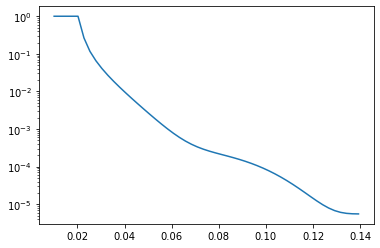

In [6]:
plt.semilogy(q, refl)

In [7]:
params = {'thickness': ((0, 100), (1, 1)), 'roughness': ((0, 20), (0, 5)), 'SLD': ((14, 14), (20, 20))}

In [33]:
my_training_data = rg(q, 0)

In [34]:
my_training_data.generate_random_labels(*params.values(), 10000, 10000, 1000)

100%|██████████| 1000/1000 [00:00<00:00, 1749.87it/s]


Finished 'generate_random_labels' in 12.4455 secs


In [35]:
print(my_training_data.training_labels.shape)
print(my_training_data.validation_labels.shape)
print(my_training_data.test_labels.shape)

(10000, 6)
(10000, 6)
(1000, 6)


In [37]:
print(my_training_data.roughness_ranges)

[[ 0 20]
 [ 0  5]]


In [38]:
file_name = 'training_data'

In [39]:
my_training_data.save_data_as_h5('training_data.h5')

In [40]:
my_input_proc = ip()

In [41]:
my_input_proc.job_list

[]

In [42]:
my_input_proc.append_to_job_list(my_input_proc.log)

In [43]:
my_input_proc.append_to_job_list(my_input_proc.standardize)

In [44]:
print(my_input_proc.job_list)

[<function InputPreprocessor.log at 0x7f2eee15ce60>, <bound method InputPreprocessor.standardize of <mlreflect.preprocessing.InputPreprocessor object at 0x7f2ea1231950>>]


In [45]:
data = my_training_data.training_reflectivity

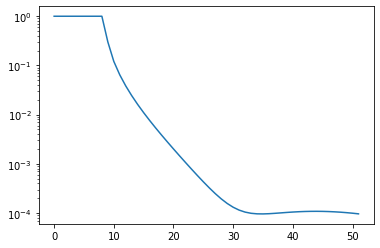

In [46]:
plt.semilogy(data[1, :])
plt.show()

In [19]:
prep_data = my_input_proc.apply_preprocessing(data)

NameError: name 'data' is not defined

In [20]:
plt.plot(prep_data[1, :])

NameError: name 'prep_data' is not defined

In [21]:
print(my_training_data.training_labels)
print(my_training_data.training_labels.shape)

NameError: name 'my_training_data' is not defined

In [22]:
my_output_proc = mlreflect.OutputPreprocessor(*params.values())

In [23]:
my_output_proc.label_names

['layer2_thickness',
 'layer1_thickness',
 'layer2_roughness',
 'layer1_roughness',
 'layer2_sld',
 'layer1_sld']

In [24]:
my_output_proc.removed_label_names

[]

In [25]:
my_output_proc.constant_label_names

['layer1_thickness', 'layer2_sld', 'layer1_sld']

In [26]:
labels = my_output_proc.apply_preprocessing(my_training_data.training_labels)

NameError: name 'my_training_data' is not defined

In [27]:
print(labels)
print(labels.shape)

NameError: name 'labels' is not defined

In [28]:
plt.plot(my_training_data.training_labels['layer2_thickness'])
plt.show()
plt.plot(labels['layer2_thickness'])
plt.show()

NameError: name 'my_training_data' is not defined

In [29]:
restored_labels = my_output_proc.restore_labels(labels, my_training_data.training_labels)

NameError: name 'labels' is not defined

In [30]:
print(restored_labels)

NameError: name 'restored_labels' is not defined

In [31]:
np.array_equal(my_training_data.training_labels, restored_labels)

NameError: name 'my_training_data' is not defined

In [51]:
np.array([3, 4, 5]) and np.array([1, 2, 3]) is None

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()